# Every Academy Award for Best Picture Winner
## (1927-2021)

## Intro
What makes an Academy Award Best Picture? This process involves web scraping every movie that was nominated for Best Picture from Wikipedia. Then, the data will be prepared for analysis to find any common threads between these Oscar worthy movies. Are there any quantitative or qualitative measurements that helps a movie get nominated? Let's find out!

## Data
https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture

## Questions
1. What is the budget for most Best Picture nominees?
2. How well do they do at the box office?
3. Do they have short, medium, or long running times?
4. What time of year do most release?
5. What countries have the most?
6. What production companies have the most?

## Setup

### Import Data

In [1]:
import pandas as pd

df = pd.read_csv('./Best_Picture_clean.csv',encoding='utf-8')
df_og = df.copy()

In [2]:
df.head()

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,...,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
0,7th Heaven,Frank Borzage,"['Harry H. Caldwell (titles)', 'Katharine Hill...",Benjamin Glazer,"['Seventh Heaven', 'by Austin Strong']",William Fox,"['Janet Gaynor', 'Charles Farrell', 'Ben Bard']","['Ernest Palmer', 'Joseph A. Valentine']",Barney Wolf,Fox Film Corporation,...,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1300000.0,2500000.0,1927-05-06
1,The Racket,Lewis Milestone,"['Bartlett Cormack', 'Tom Miranda', 'Uncredite...",NaN,NaN,Howard Hughes,"['Thomas Meighan', 'Marie Prevost', 'Louis Wol...",Tony Gaudio,Eddie Adams,Paramount Pictures,...,"['November 1, 1928 (1928-11-01)']",NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN
2,The Broadway Melody,Harry Beaumont,"['Sarah Y. Mason', '(continuity)', 'Norman Hou...",NaN,NaN,"['Irving Thalberg', 'Lawrence Weingarten']","['Charles King', 'Anita Page', 'Bessie Love']",John Arnold,"['Sam S. Zimbalist', 'Uncredited:', 'William L...",Metro-Goldwyn-Mayer,...,NaN,Edmund Goulding,(see article),NaN,NaN,NaN,100.0,379000.0,4400000.0,1929-02-01
3,Alibi,Roland West,Elaine Sterne Carrington,NaN,"['Nightstick', 'by', 'Elaine Sterne Carrington...",Roland West,"['Chester Morris', 'Mae Busch']",Ray June,NaN,United Artists,...,"['April 20, 1929 (1929-04-20)']",NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN
4,The Hollywood Revue of 1929,Charles Reisner,"['Al Boasberg', 'Robert E. Hopkins', 'Joseph W...",NaN,NaN,"['Irving Thalberg', 'Harry Rapf']","['Conrad Nagel', 'Jack Benny']","['John Arnold', 'Max Fabian', 'Irving G. Ries'...","['William S. Gray', 'Cameron K. Wood']",Metro-Goldwyn-Mayer,...,NaN,NaN,"['Gus Edwards', 'Arthur Freed', '(""', ""Singin'...",NaN,NaN,NaN,130.0,426000.0,2421000.0,1929-06-20


### Data Info

In [3]:
df.notna().sum()

title                    580
Directed by              580
Written by               206
Screenplay by            384
Based on                 380
Produced by              574
Starring                 580
Cinematography           578
Edited by                576
Distributed by           579
Release dates            287
Running time             579
Country                  481
Language                 513
Budget                   519
Box office               551
Production company       241
Release date             293
Story by                  57
Music by                 540
Languages                 59
Production companies     235
Countries                 96
Running time(minutes)    578
Budget(USD)              519
Box office(USD)          551
Release dates(dt)        287
dtype: int64

In [4]:
df.drop(columns=['Running time','Release dates','Box office','Budget'],inplace=True)
df.columns

Index(['title', 'Directed by', 'Written by', 'Screenplay by', 'Based on',
       'Produced by', 'Starring', 'Cinematography', 'Edited by',
       'Distributed by', 'Country', 'Language', 'Production company',
       'Release date', 'Story by', 'Music by', 'Languages',
       'Production companies', 'Countries', 'Running time(minutes)',
       'Budget(USD)', 'Box office(USD)', 'Release dates(dt)'],
      dtype='object')

In [5]:
df.shape

(580, 23)

In [6]:
pd.set_option('display.max_columns', 23)
df.head()

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,Country,Language,Production company,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
0,7th Heaven,Frank Borzage,"['Harry H. Caldwell (titles)', 'Katharine Hill...",Benjamin Glazer,"['Seventh Heaven', 'by Austin Strong']",William Fox,"['Janet Gaynor', 'Charles Farrell', 'Ben Bard']","['Ernest Palmer', 'Joseph A. Valentine']",Barney Wolf,Fox Film Corporation,United States,Silent (English intertitles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1300000.0,2500000.0,1927-05-06
1,The Racket,Lewis Milestone,"['Bartlett Cormack', 'Tom Miranda', 'Uncredite...",NaN,NaN,Howard Hughes,"['Thomas Meighan', 'Marie Prevost', 'Louis Wol...",Tony Gaudio,Eddie Adams,Paramount Pictures,United States,Silent (English intertitles),The Caddo Company,"['November 1, 1928 (1928-11-01)']",NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN
2,The Broadway Melody,Harry Beaumont,"['Sarah Y. Mason', '(continuity)', 'Norman Hou...",NaN,NaN,"['Irving Thalberg', 'Lawrence Weingarten']","['Charles King', 'Anita Page', 'Bessie Love']",John Arnold,"['Sam S. Zimbalist', 'Uncredited:', 'William L...",Metro-Goldwyn-Mayer,United States,English,NaN,NaN,Edmund Goulding,(see article),NaN,NaN,NaN,100.0,379000.0,4400000.0,1929-02-01
3,Alibi,Roland West,Elaine Sterne Carrington,NaN,"['Nightstick', 'by', 'Elaine Sterne Carrington...",Roland West,"['Chester Morris', 'Mae Busch']",Ray June,NaN,United Artists,United States,English,NaN,"['April 20, 1929 (1929-04-20)']",NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN
4,The Hollywood Revue of 1929,Charles Reisner,"['Al Boasberg', 'Robert E. Hopkins', 'Joseph W...",NaN,NaN,"['Irving Thalberg', 'Harry Rapf']","['Conrad Nagel', 'Jack Benny']","['John Arnold', 'Max Fabian', 'Irving G. Ries'...","['William S. Gray', 'Cameron K. Wood']",Metro-Goldwyn-Mayer,United States,English,NaN,NaN,NaN,"['Gus Edwards', 'Arthur Freed', '(""', ""Singin'...",NaN,NaN,NaN,130.0,426000.0,2421000.0,1929-06-20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  580 non-null    object 
 1   Directed by            580 non-null    object 
 2   Written by             206 non-null    object 
 3   Screenplay by          384 non-null    object 
 4   Based on               380 non-null    object 
 5   Produced by            574 non-null    object 
 6   Starring               580 non-null    object 
 7   Cinematography         578 non-null    object 
 8   Edited by              576 non-null    object 
 9   Distributed by         579 non-null    object 
 10  Country                481 non-null    object 
 11  Language               513 non-null    object 
 12  Production company     241 non-null    object 
 13  Release date           293 non-null    object 
 14  Story by               57 non-null     object 
 15  Music 

## Exploratory Analysis & Visualizations

### Columns we'll analyze:
* Budget(USD)
* Box office(USD)
* Running time(minutes)
* Release dates(dt)
* Country
* Production company

In [8]:
df['title'] = df['title'].astype('str')

df['Country'] = df['Country'].astype('category')
df['Production company'] = df['Production company'].astype('category')

df['Release dates(dt)'] = pd.to_datetime(df['Release dates(dt)'])

### Budget (USD)

<AxesSubplot:xlabel='Budget(USD)'>

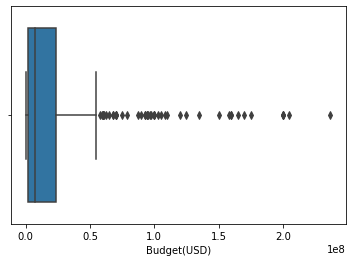

In [9]:
import seaborn as sns

budget = df['Budget(USD)']
sns.boxplot(x=budget)

### Box Office (USD)

<AxesSubplot:xlabel='Box office(USD)'>

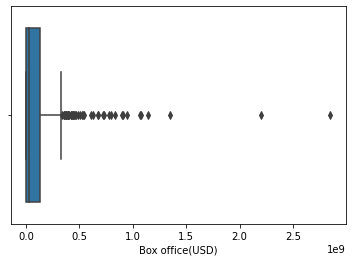

In [10]:
box_office = df['Box office(USD)']
sns.boxplot(x=box_office)

### Running Time (minutes)

<AxesSubplot:xlabel='Running time(minutes)'>

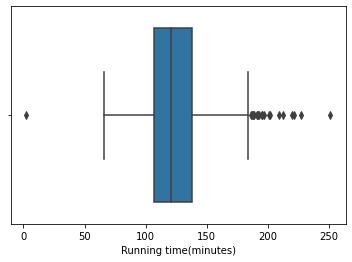

In [11]:
running_time = df['Running time(minutes)']
sns.boxplot(x=running_time)

### Release Date

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for p in ['D', 'M', 'Y']:
            if p=='D':
                print("Plotting daily data")
            elif p=='M':
                print("Plotting monthly data")
            else:
                print("Plotting yearly data")
            for col_num in df.select_dtypes(include=np.number).columns: #select 'Running time(minutes)', 'Budget(USD)', 'Box office(USD)'
                #if col_num == 'Running time(minutes)':
                __ = df.copy()
                __ = __.set_index(['Release dates(dt)'])
                __T = __.resample(p).sum()
                ax = __T[[col_num]].plot()
                ax.set_ylim(bottom=0)
                ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                plt.show()

In [13]:
df.select_dtypes(include=np.number).columns

Index(['Running time(minutes)', 'Budget(USD)', 'Box office(USD)'], dtype='object')

<AxesSubplot:xlabel='Release dates(dt)'>

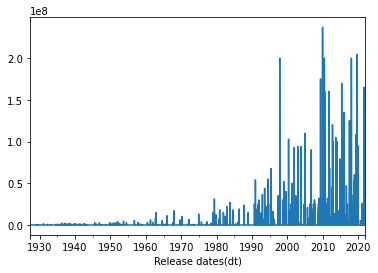

In [14]:
df.set_index(['Release dates(dt)']).resample('D').sum()['Budget(USD)'].plot()

In [15]:
df.set_index(['Release dates(dt)']).loc['1976-11-21']

title                                                                Rocky
Directed by                                               John G. Avildsen
Written by                                              Sylvester Stallone
Screenplay by                                                          NaN
Based on                                                               NaN
Produced by                           ['Irwin Winkler', 'Robert Chartoff']
Starring                 ['Sylvester Stallone', 'Talia Shire', 'Burt Yo...
Cinematography                                                 James Crabe
Edited by                               ['Richard Halsey', 'Scott Conrad']
Distributed by                                              United Artists
Country                                                      United States
Language                                                           English
Production company                            Chartoff-Winkler Productions
Release date             

In [16]:
df.select_dtypes(include='datetime64').columns

Index(['Release dates(dt)'], dtype='object')

In [17]:
df.sort_values(by='Budget(USD)',ascending=False)

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,Country,Language,Production company,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
465,Avatar,James Cameron,James Cameron,NaN,NaN,"['James Cameron', 'Jon Landau']","['Sam Worthington', 'Zoe Saldana', 'Stephen La...",Mauro Fiore,"['Stephen Rivkin', 'John Refoua', 'James Camer...",20th Century Fox,United States,English,NaN,NaN,NaN,James Horner,NaN,"['20th Century Fox', 'Lightstorm Entertainment...",NaN,162.0,237000000.0,2.847000e+09,2009-12-10
555,The Irishman,Martin Scorsese,NaN,Steven Zaillian,"['I Heard You Paint Houses', 'by', 'Charles Br...","['Martin Scorsese', 'Robert De Niro', 'Jane Ro...","['Robert De Niro', 'Al Pacino', 'Joe Pesci', '...",Rodrigo Prieto,Thelma Schoonmaker,Netflix,United States,English,NaN,NaN,NaN,Robbie Robertson,NaN,"['TriBeCa Productions', 'Sikelia Productions',...",NaN,209.0,204500000.0,8.000000e+06,2019-09-27
546,Black Panther,Ryan Coogler,"['Ryan Coogler', 'Joe Robert Cole']",NaN,"['Stan Lee', 'Jack Kirby']",Kevin Feige,"['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",Rachel Morrison,"['Michael P. Shawver', 'Debbie Berman']","['Walt Disney Studios', 'Motion Pictures']",United States,English,Marvel Studios,NaN,NaN,Ludwig Göransson,NaN,NaN,NaN,134.0,200000000.0,1.348000e+09,2018-01-29
481,Toy Story 3,Lee Unkrich,NaN,Michael Arndt,NaN,Darla K. Anderson,"['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Don...","['Jeremy Lasky', 'Kim White']",Ken Schretzmann,"['Walt Disney Studios', 'Motion Pictures']",United States,English,NaN,NaN,"['John Lasseter', 'Andrew Stanton', 'Lee Unkri...",Randy Newman,NaN,"['Walt Disney Pictures', 'Pixar Animation Stud...",NaN,103.0,200000000.0,1.067000e+09,2010-06-12
404,Titanic,James Cameron,James Cameron,NaN,NaN,"['James Cameron', 'Jon Landau']","['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...",Russell Carpenter,"['Conrad Buff', 'James Cameron', 'Richard A. H...","['Paramount Pictures(North America)', '20th Ce...",United States,English,NaN,NaN,NaN,James Horner,NaN,"['Paramount Pictures', '20th Century Fox', 'Li...",NaN,195.0,200000000.0,2.202000e+09,1997-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,The Goodbye Girl,Herbert Ross,Neil Simon,NaN,NaN,Ray Stark,"['Richard Dreyfuss', 'Marsha Mason', 'Quinn Cu...",David M. Walsh,John F. Burnett,Warner Bros.,United States,English,NaN,"['November 30, 1977 (1977-11-30)']",NaN,Dave Grusin,NaN,"['Metro-Goldwyn-Mayer', '(uncredited)', 'Rastar']",NaN,110.0,NaN,1.020000e+08,NaT
308,The Turning Point,Herbert Ross,Arthur Laurents,NaN,NaN,"['Arthur Laurents', 'Herbert Ross', 'Nora Kaye']","['Anne Bancroft', 'Shirley MacLaine', 'Tom Ske...",Robert Surtees,William H. Reynolds,20th Century Fox,United States,English,NaN,"['November 14, 1977 (1977-11-14)']",NaN,NaN,NaN,NaN,NaN,119.0,NaN,3.360000e+07,NaT
360,The Accidental Tourist,Lawrence Kasdan,NaN,"['Frank Galati', 'Lawrence Kasdan']","['The Accidental Tourist', 'by', 'Anne Tyler']","['Lawrence Kasdan', 'Charles Okun', 'Michael G...","['William Hurt', 'Kathleen Turner', 'Geena Dav...",John Bailey,Carol Littleton,Warner Bros. Pictures,United States,English,NaN,"['December 23, 1988 (1988-12-23)']",NaN,John Williams,NaN,NaN,NaN,121.0,NaN,3.260000e+07,NaT
571,Belfast,Kenneth Branagh,Kenneth Branagh,NaN,NaN,"['Laura Berwick', 'Kenneth Branagh', 'Becca Ko...","['Caitríona Balfe', 'Judi Dench', 'Jamie Dorna...",Haris Zambarloukos,Úna Ní Dhonghaíle,"['Focus Features', '(United States)', 'Univers...",United Kingdom,English,NaN,NaN,NaN,Van Morrison,NaN,"['Northern Ireland Screen', 'TKBC']",NaN,97.0,NaN,4.910000e+07,2021-09-02



To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


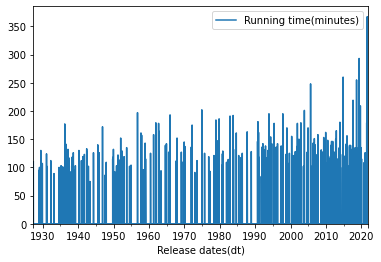

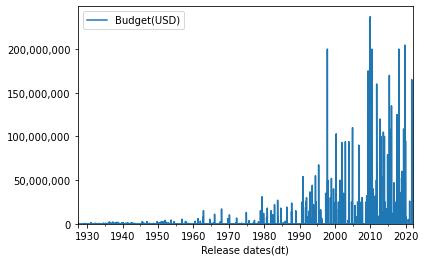

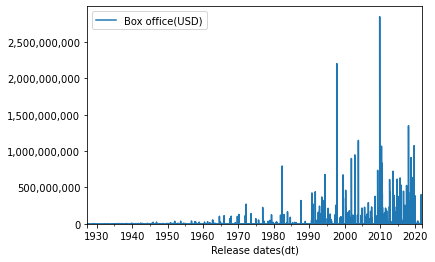

Plotting monthly data


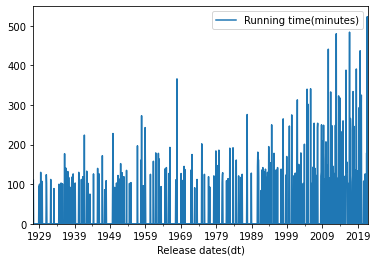

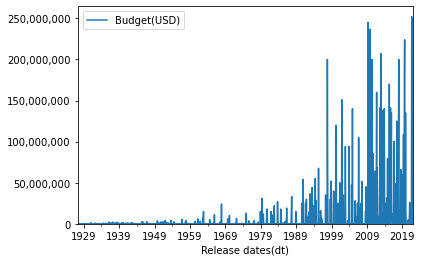

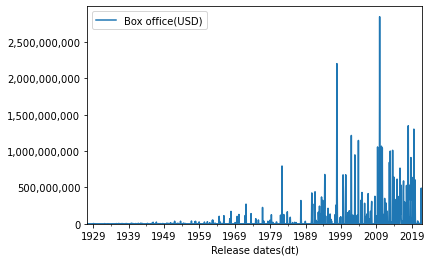

Plotting yearly data


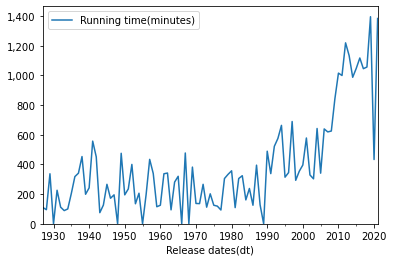

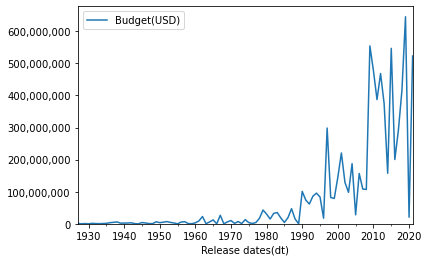

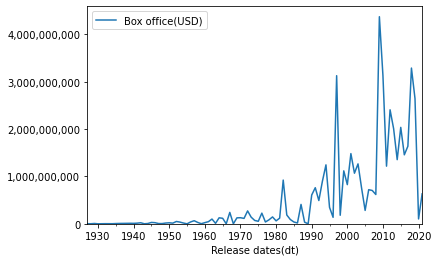

In [18]:
release = df['Release dates(dt)']
time_series_plot(df)

### Country

In [19]:
df['Country'].value_counts()

United States         439
United Kingdom         32
Australia               2
France                  2
Sweden                  2
Italy                   1
Japan                   1
South Korea             1
['United Kingdom']      1
Name: Country, dtype: int64

In [20]:
df.replace("['United Kingdom']","United Kingdom",inplace=True)

In [21]:
df['Country'].value_counts()

United States     439
United Kingdom     33
Australia           2
France              2
Sweden              2
Italy               1
Japan               1
South Korea         1
Name: Country, dtype: int64

### Production Company

In [22]:
vc = df['Production company'].value_counts()
vc[vc>1]

Metro-Goldwyn-Mayer                               32
Columbia Pictures                                 12
Paramount Pictures                                11
Warner Bros.                                       9
RKO Radio Pictures                                 9
Samuel Goldwyn Productions                         8
20th Century Fox                                   6
Warner Bros. Pictures                              5
Horizon Pictures                                   4
Romulus Films                                      3
Universal Pictures                                 3
Stanley Kramer Productions                         3
Rainbow Productions                                2
Mirage Enterprises                                 2
Lucasfilm Ltd.                                     2
Hal Wallis Productions                             2
Selznick International Pictures                    2
Goldcrest Films                                    2
The Caddo Company                             

## Outliers

There were three notable outliers in terms of budget and box office numbers for Best Picture nominees.

### 1980-1990 Box Office Outlier

In [31]:
eighties = (df['Release dates(dt)'].dt.year>1980) & (df['Release dates(dt)'].dt.year<1990)
df.loc[eighties].sort_values(by='Box office(USD)',ascending=False).head(1)

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,Country,Language,Production company,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
330,E.T. the Extra-Terrestrial,Steven Spielberg,Melissa Mathison,NaN,NaN,"['Kathleen Kennedy', 'Steven Spielberg']","['Dee Wallace', 'Henry Thomas', 'Peter Coyote'...",Allen Daviau,Carol Littleton,Universal Pictures,United States,English,Amblin Entertainment,NaN,NaN,John Williams,NaN,NaN,NaN,114.0,10500000.0,794900000.0,1982-05-26


In [33]:
df_og.loc[330]

title                                           E.T. the Extra-Terrestrial
Directed by                                               Steven Spielberg
Written by                                                Melissa Mathison
Screenplay by                                                          NaN
Based on                                                               NaN
Produced by                       ['Kathleen Kennedy', 'Steven Spielberg']
Starring                 ['Dee Wallace', 'Henry Thomas', 'Peter Coyote'...
Cinematography                                                Allen Daviau
Edited by                                                  Carol Littleton
Distributed by                                          Universal Pictures
Release dates            ['May 26, 1982 (1982-05-26) (Cannes)', 'June 1...
Running time                                               ['114 minutes']
Country                                                      United States
Language                 

"E.T. the Extra-Terrestrial" was an outlier during the 80's, raking in 794.9 million USD at the box office.

### 1990-2000 Budget/Box Office Outlier

In [30]:
nineties = (df['Release dates(dt)'].dt.year>1990) & (df['Release dates(dt)'].dt.year<2000)
df.loc[nineties].sort_values(by='Budget(USD)',ascending=False).head(1)

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,Country,Language,Production company,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
404,Titanic,James Cameron,James Cameron,NaN,NaN,"['James Cameron', 'Jon Landau']","['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...",Russell Carpenter,"['Conrad Buff', 'James Cameron', 'Richard A. H...","['Paramount Pictures(North America)', '20th Ce...",United States,English,NaN,NaN,NaN,James Horner,NaN,"['Paramount Pictures', '20th Century Fox', 'Li...",NaN,195.0,200000000.0,2.202000e+09,1997-11-01


During the 90's, "Titanic" had a budget of 200 million USD and raked in over 2.2 billion USD at the box office.

### 2000-2010 Budget/Box Office Outlier

In [32]:
tens = (df['Release dates(dt)'].dt.year>2000) & (df['Release dates(dt)'].dt.year<2010)
df.loc[tens].sort_values(by='Budget(USD)',ascending=False).head(1)

,title,Directed by,Written by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Distributed by,Country,Language,Production company,Release date,Story by,Music by,Languages,Production companies,Countries,Running time(minutes),Budget(USD),Box office(USD),Release dates(dt)
465,Avatar,James Cameron,James Cameron,NaN,NaN,"['James Cameron', 'Jon Landau']","['Sam Worthington', 'Zoe Saldana', 'Stephen La...",Mauro Fiore,"['Stephen Rivkin', 'John Refoua', 'James Camer...",20th Century Fox,United States,English,NaN,NaN,NaN,James Horner,NaN,"['20th Century Fox', 'Lightstorm Entertainment...",NaN,162.0,237000000.0,2.847000e+09,2009-12-10


James Cameron struck gold again in the 2000's with "Avatar". It had a budget of 237 million USD and has the highest box office numbers of all time at about 2.8 billion USD.

## Summary & Conclusion

### Insights:
* 
* 
* 
* 
* 